In [1]:
import numpy as np
import os
import platform

from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector


In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
elif platform.system() == 'Linux':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
else:
    raise OSError('Unknown platform')

In [3]:
run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_strip'

file_nums = list(range(0, 1))
# file_nums = 'all'

chunk_size = 5  # Number of files to process at once

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'

try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
# det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True, waveform_fit_func='waveform_func')
det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=True, waveform_fit_func='parabola')
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [5, 6, 7, 8]
HV: {'drift': 600, 'resist_1': 410}
Pedestal data shape: (1033, 256, 32)
Pedestal fits: (256,)
Reading in data...


100%|██████████| 1/1 [00:01<00:00,  1.85s/it]


Read in data shape: (2165, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

Fitting time: 4.096672773361206 s
Processed chunk 1/1
Getting hits...
Hits shape: (2165, 256)


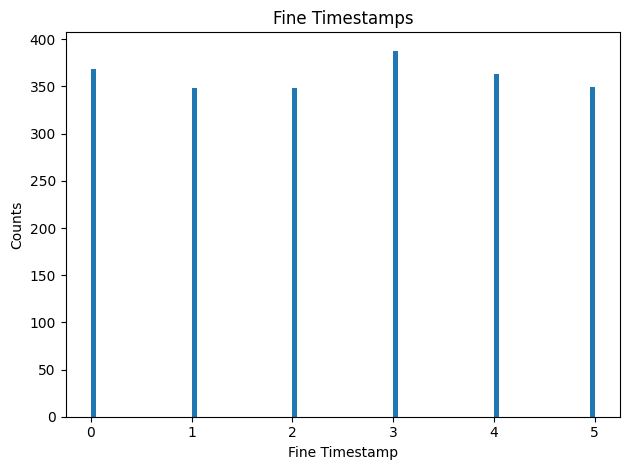

In [6]:
det.dream_data.plot_fine_timestamp_hist()

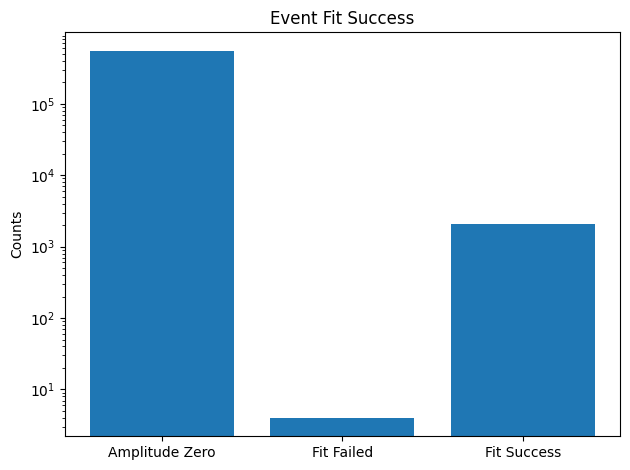

In [7]:
det.dream_data.plot_event_fit_success()

Found 2076 event channels with fit params in ranges.


/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1209: RuntimeWarning: invalid value encountered in sqrt
  term1 = np.sqrt((2 * q - 1) / (2 * q + 1)) * np.sin(w * t[positive_t_mask] / 2 * np.sqrt(4 - 1 / q ** 2))
/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1210: RuntimeWarning: invalid value encountered in sqrt
  term2 = -np.cos(w * t[positive_t_mask] / 2 * np.sqrt(4 - 1 / q ** 2))
/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1202: RuntimeWarning: invalid value encountered in sqrt
  term1 = np.sqrt((2 * q - 1) / (2 * q + 1)) * np.sin(w * t / 2 * np.sqrt(4 - 1 / q ** 2))
/local/home/dn277127/PycharmProjects/saclay_micromegas/DreamData.py:1203: RuntimeWarning: invalid value encountered in sqrt
  term2 = -np.cos(w * t / 2 * np.sqrt(4 - 1 / q ** 2))


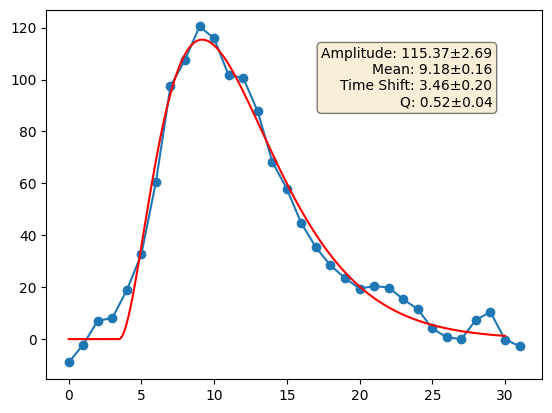

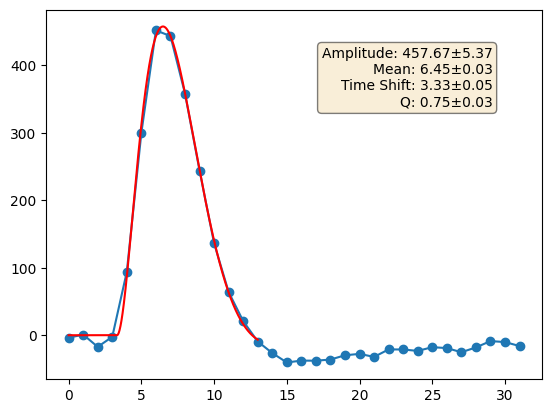

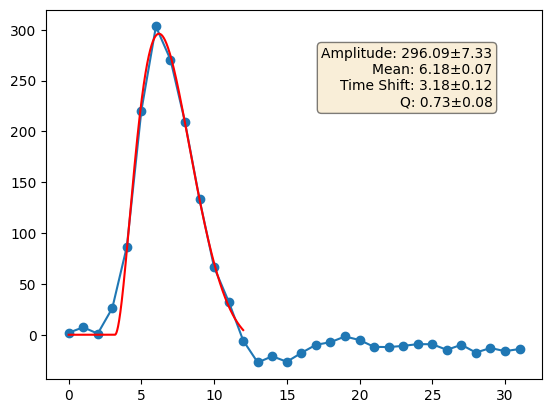

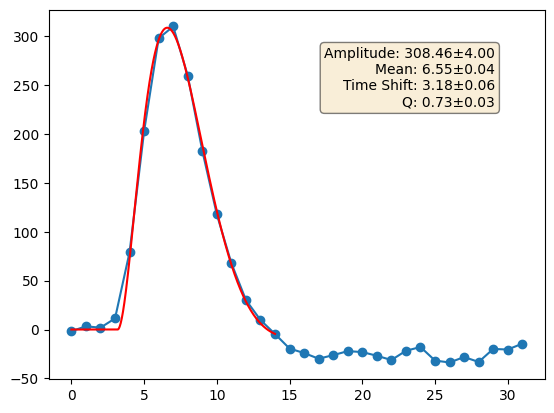

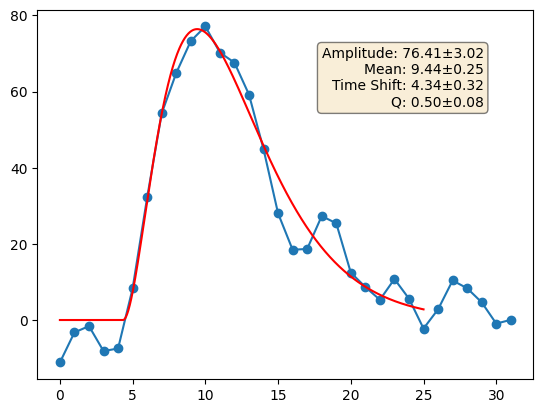

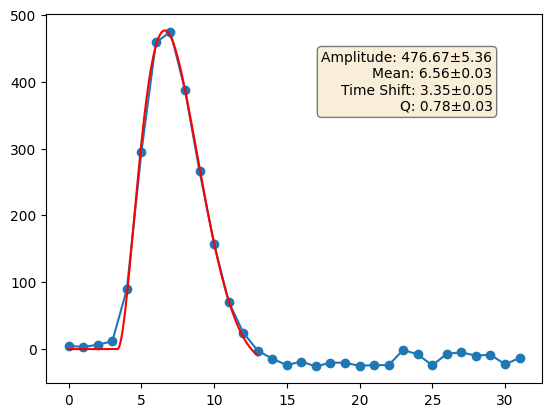

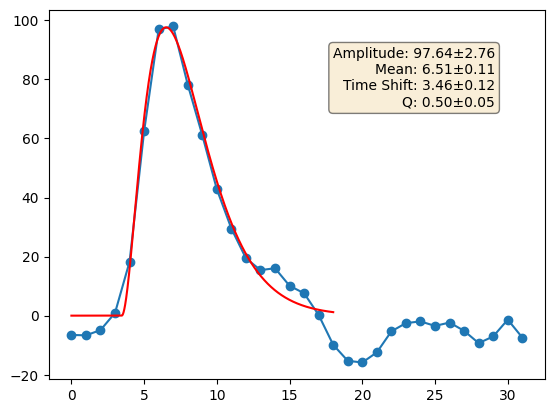

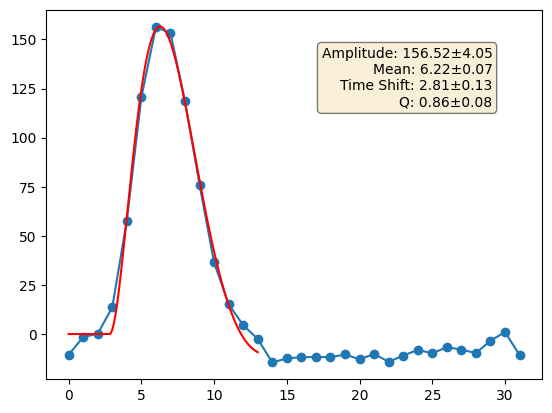

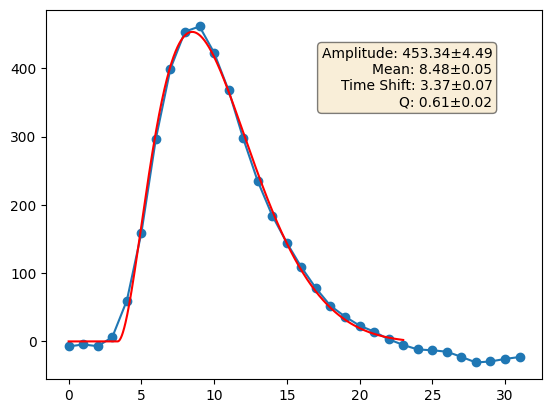

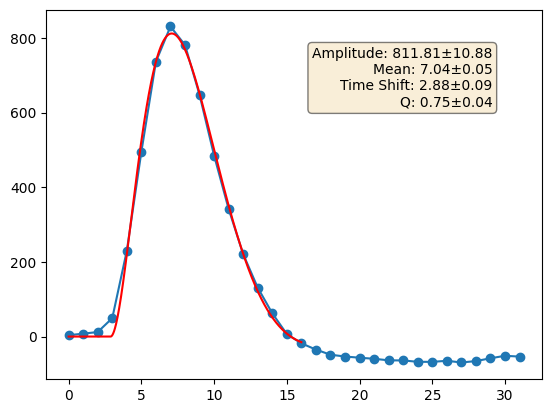

In [8]:
det.dream_data.plot_fits({'time_max': [-1, 40]}, n_max=10)

In [9]:
det.dream_data.waveforms = None  # Clear the memory

np.float64(0.48290079907427325)

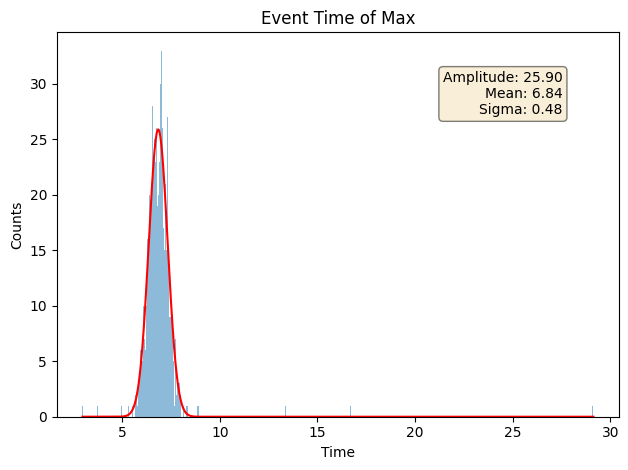

In [10]:
# Plot plot_event_time_maxes for minimum sigma
det.dream_data.correct_for_fine_timestamps()
det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)

Now run with parabola fitting to see difference

In [11]:
det2 = DreamDetector(config=det_config)
det2.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')

Pedestal data shape: (1033, 256, 32)
Pedestal fits: (256,)
Reading in data...


100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


Read in data shape: (2165, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 208.22it/s]

data.shape: (309, 256, 32)
data.shape: (309, 256, 32)
data.shape: (310, 256, 32)
data.shape: (309, 256, 32)
data.shape: (310, 256, 32)
data.shape: (309, 256, 32)
data.shape: (309, 256, 32)
Fitting time: 0.050653934478759766 s
Processed chunk 1/1
Getting hits...


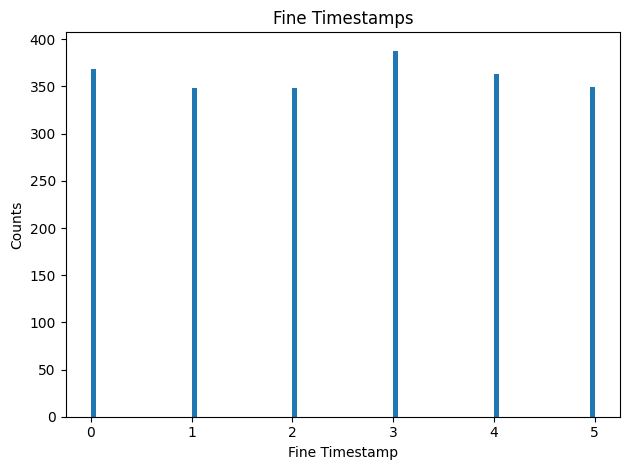

In [12]:
det2.dream_data.plot_fine_timestamp_hist()

np.float64(0.5674366253107812)

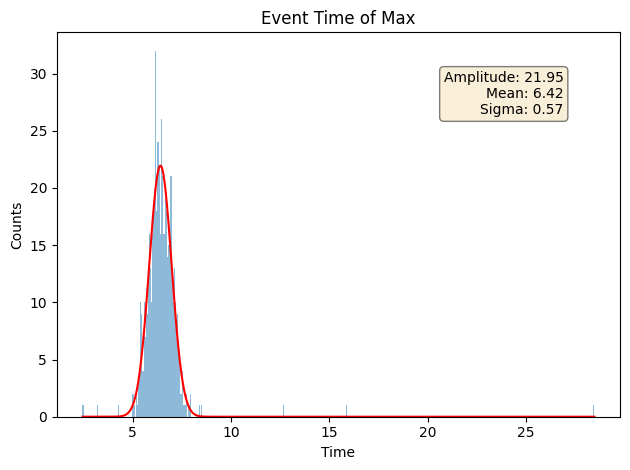

In [13]:
det2.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)

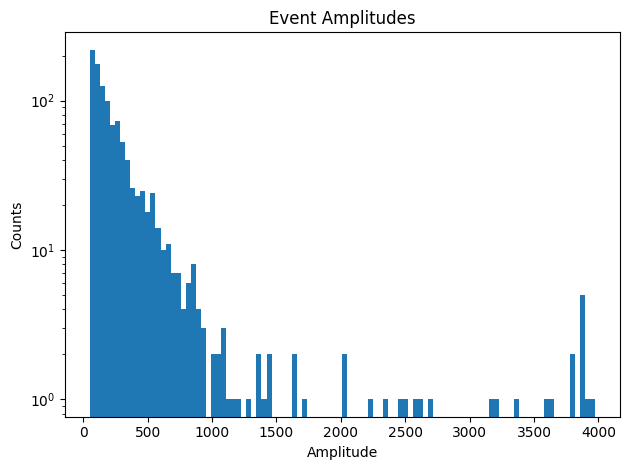

In [14]:
det2.dream_data.plot_event_amplitudes(channels=np.arange(int(256 / 2), 256), logy=True)

np.float64(0.48290079907427325)

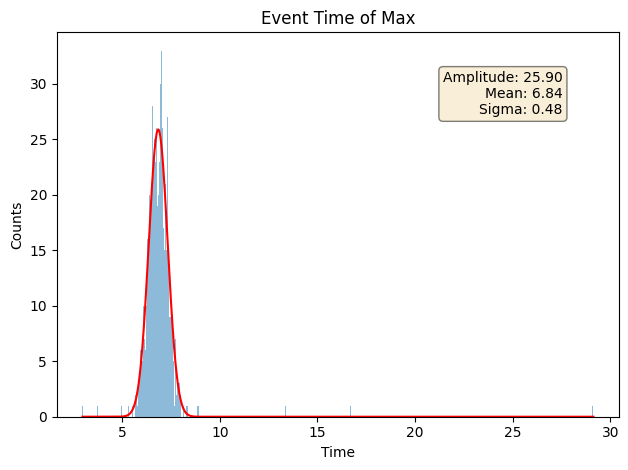

In [15]:
# Plot plot_event_time_maxes for minimum sigma
det2.dream_data.correct_for_fine_timestamps()
det2.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)

Plot the two sigmas on the same plot